In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('../Datasets/MapData-Evans-GP-Flatten.csv')

# Info
1. Remove ununsed columns
2. One-hot encoding categorical data
3. Calculate weight for each resource
4. Sum up resources by the given weight (The sum should be in \[0.0, 1.0\])
5. Remove resource columns

In [7]:
print('Shape', data.shape)

Shape (50901, 79)


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50901 entries, 0 to 50900
Data columns (total 79 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Latitude °                    50901 non-null  int64 
 1   Latitude                      50901 non-null  object
 2   Longitude °                   50901 non-null  int64 
 3   Longitude                     50901 non-null  object
 4   Topography                    50901 non-null  object
 5   Difficulty Challenge          50901 non-null  int64 
 6   Altitude                      50901 non-null  int64 
 7   Temperature                   50901 non-null  int64 
 8   Metals                        50901 non-null  int64 
 9   Rare Metals                   50901 non-null  int64 
 10  Concrete                      50901 non-null  int64 
 11  Water                         50901 non-null  int64 
 12  Dust Devils                   50901 non-null  int64 
 13  Dust Storms     

In [5]:
data.describe()

,Latitude °,Longitude °,Difficulty Challenge,Altitude,Temperature,Metals,Rare Metals,Concrete,Water,Dust Devils,Dust Storms,Meteors,Cold Waves
count,50901.000000,50901.000000,50901.000000,50901.000000,50901.00000,50901.000000,50901.000000,50901.000000,50901.000000,50901.000000,50901.000000,50901.000000,50901.000000
mean,35.248227,90.249307,133.196204,-425.882576,-35.55828,2.434962,2.434962,2.207069,2.703287,1.675802,2.214416,2.120823,2.150744
std,20.352820,52.106773,34.572810,2927.879760,30.46709,0.784851,0.784851,1.141824,1.153535,0.648712,1.138605,0.971024,1.388051
min,0.000000,0.000000,100.000000,-8200.000000,-100.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,18.000000,45.000000,100.000000,-3353.000000,-72.00000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
50%,35.000000,90.000000,140.000000,-121.000000,-15.00000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000
75%,53.000000,135.000000,140.000000,1840.000000,-15.00000,3.000000,3.000000,3.000000,4.000000,2.000000,3.000000,3.000000,4.000000
max,70.000000,180.000000,240.000000,21229.000000,-1.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [8]:
data.head()

,Latitude °,Latitude,Longitude °,Longitude,Topography,Difficulty Challenge,Altitude,Temperature,Metals,Rare Metals,...,Superconducting Computing,Superfungus,Superior Cables,Superior Pipes,Sustained Workload,The Positronic Brain,Vector Pump,Vocation-Oriented Society,Wireless Power,Zero-Space Computing
0,0,S,0,E,Relatively Flat,140,-929,-1,2,2,...,True,True,False,False,False,False,False,True,False,True
1,0,S,1,E,Relatively Flat,100,-1160,-1,2,2,...,True,False,False,False,True,False,False,False,False,False
2,0,S,1,W,Relatively Flat,100,-1160,-3,2,2,...,False,False,False,False,False,False,False,True,False,False
3,0,S,2,E,Relatively Flat,140,-1160,-1,2,2,...,True,False,True,False,False,False,False,False,False,False
4,0,S,2,W,Relatively Flat,100,-929,-3,2,2,...,True,False,False,False,False,False,True,False,False,True


In [9]:
import matplotlib.pyplot as plt
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix', fontsize=15)
    plt.show()

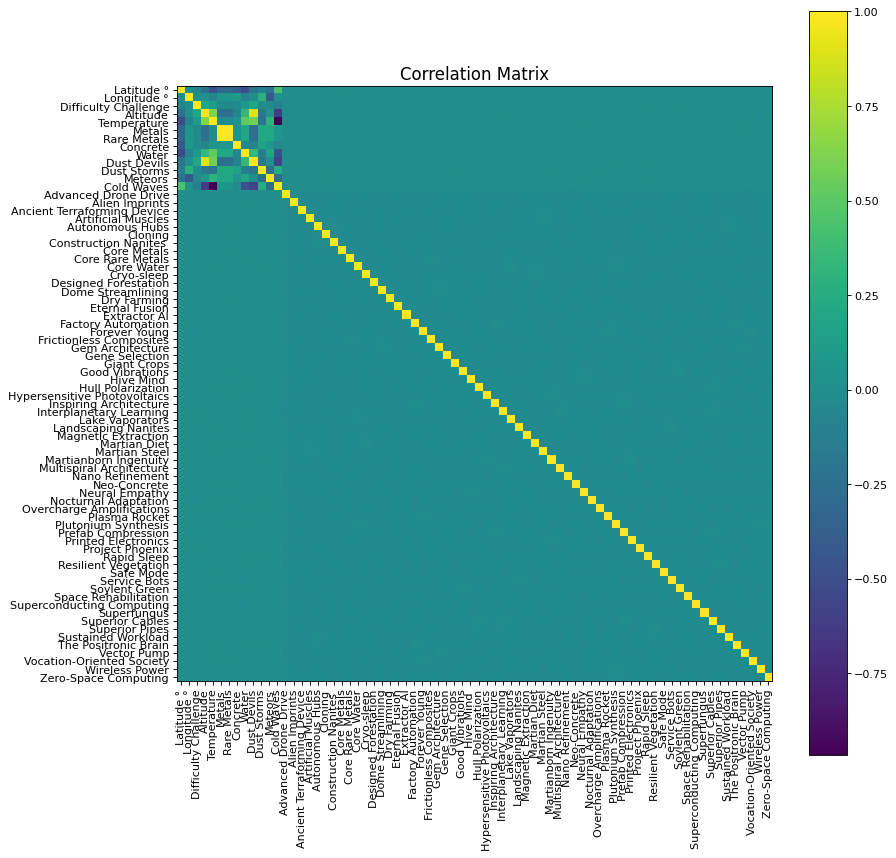

In [11]:
# According to this graph, we know bool resources have no strong correlation to numerical resources or location
plotCorrelationMatrix(data, 12)

## Remove ununsed columns

In [76]:
s = (data.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical attributes")
print(object_cols)

# We need to remove unnecessary attributes in order to train the network
# Map Name, Named Location

Categorical attributes
['Latitude', 'Longitude', 'Topography', 'Map Name', 'Named Location']


In [77]:
data_dropped = data.drop(['Map Name', 'Named Location'], axis=1)
object_cols = ['Latitude', 'Longitude', 'Topography']

## One-hot encoding

In [9]:
from sklearn.preprocessing import OneHotEncoder

In [78]:
data_encoded = data_dropped.copy()
for object_col in object_cols:
    col = pd.get_dummies(data_dropped[object_col], prefix=object_col)
    data_encoded = pd.concat([data_encoded, col], axis=1)
data_encoded.iloc[:5, -8:]

,Latitude_N,Latitude_S,Longitude_E,Longitude_W,Topography_Mountainous,Topography_Relatively Flat,Topography_Rough,Topography_Steep
0,0,1,1,0,0,1,0,0
1,0,1,1,0,0,1,0,0
2,0,1,0,1,0,1,0,0
3,0,1,1,0,0,1,0,0
4,0,1,0,1,0,1,0,0


In [72]:
# Remove categorical cols. Run only once
data_encoded = data_encoded.drop(object_cols, axis=1)

## Calculate weight for each resource

In [ ]:
# Bool resources

# Numerical resources


## Sum up resources by their weights

# Final Dataset
1. We use existing attributes for inputs
2. We need 4 maps for labels - Resource Map, Danger Map, Geography map and Equipment map
3. Network should predict what are best locations to start a colony (a matrix of real values indicating each point on the input data)

- Inputs : Existing data attributes
- Label : Equipment Map x Resource Map x Danger Map^-1